In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delivery=pd.read_csv('Deliveries.csv')

## 2D plot

In [3]:
match=pd.read_csv('matches.csv')

In [4]:
new=delivery.merge(match,left_on='match_id',right_on='id')

In [7]:
new.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [10]:
x=new.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [12]:
x

,season,batsman,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3
5,2008,A Symonds,161
6,2008,AA Noffke,9
7,2008,AB Agarkar,54
8,2008,AB Dinda,2
9,2008,AB de Villiers,95


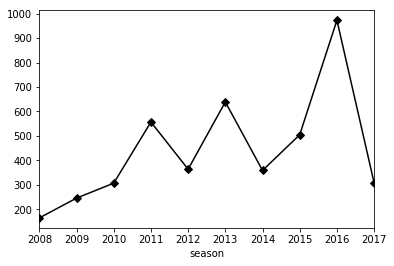

In [13]:
x[x['batsman']=='V Kohli'].set_index('season')['batsman_runs'].plot(color="black",marker='D')

In [22]:
import random
color=['red','green','blue','yellow','black']
def batsman_seasonwise_performance(*batsman_name):
    for i in batsman_name:
            new_color=random.choice(color)
            new=delivery.merge(match,left_on='match_id',right_on='id')
            x=new.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
            x[x['batsman']==i].set_index('season')['batsman_runs'].plot(color=new_color,marker='D')
    
    

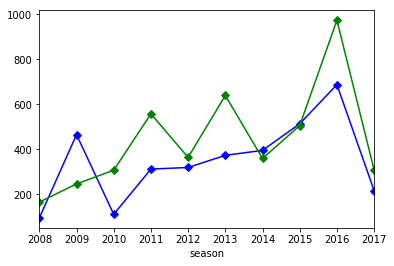

In [24]:
batsman_seasonwise_performance('AB de Villiers','V Kohli')

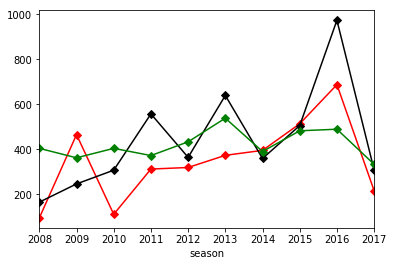

In [25]:
batsman_seasonwise_performance('AB de Villiers','V Kohli','RG Sharma')

In [33]:
k=delivery.groupby(['inning','batsman'])['batsman_runs'].sum().reset_index()

In [36]:
k=k[k['batsman']=='V Kohli']

In [41]:
plt.style.available
plt.style.use('fivethirtyeight')

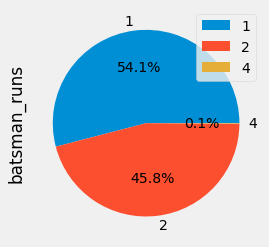

In [42]:
k.set_index('inning')['batsman_runs'].plot(kind='pie',legend=True,autopct='%0.1f%%')

In [43]:
def batsman_inningswise_performance(batsman_name):
    k=delivery.groupby(['inning','batsman'])['batsman_runs'].sum().reset_index()
    k=k[k['batsman']==batsman_name]
    plt.style.available
    plt.style.use('fivethirtyeight')
    k.set_index('inning')['batsman_runs'].plot(kind='pie',legend=True,autopct='%0.1f%%')

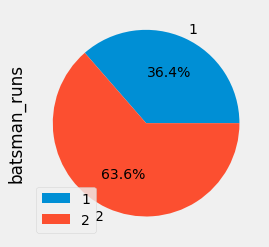

In [46]:
batsman_inningswise_performance('AD Russell')

In [52]:
def batsman_vs_team_performance(batsman_name):
    x=delivery.groupby(['bowling_team','batsman'])['batsman_runs'].sum().reset_index()
    x=x[x['batsman']==batsman_name]
    x.set_index('bowling_team')['batsman_runs'].plot(kind='barh')

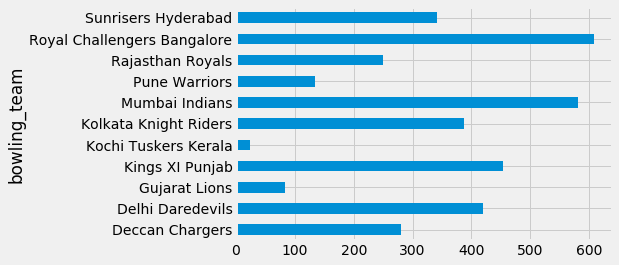

In [54]:
batsman_vs_team_performance('MS Dhoni')

In [59]:
def frequency(batsman_name):
    o=delivery.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
    o=o[o['batsman']==batsman_name]
    o.set_index('match_id')['batsman_runs'].plot(kind='hist')
    

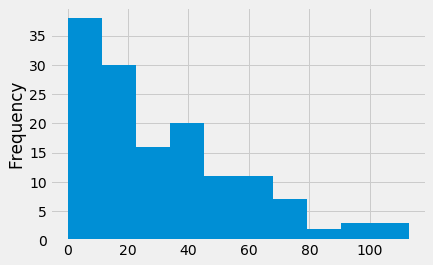

In [60]:
frequency('V Kohli')

In [64]:
a=[23,34,13,25,67,71,60]   #suppose we have two lists
b=[15,35,30,50,11,56,89]

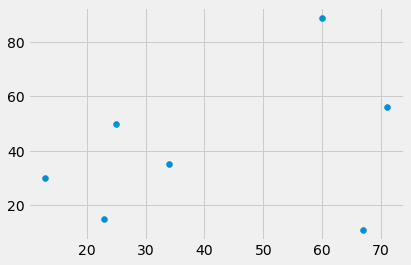

In [65]:
plt.scatter(a,b)   #we just plotted the points in the 2D graph

In [94]:
data=sns.load_dataset('tips')

In [95]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


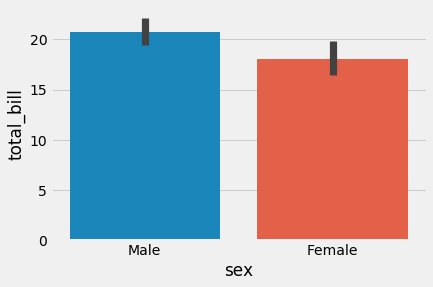

In [96]:
sns.barplot(x='sex',y='total_bill',data=data) #most people who eat more are male

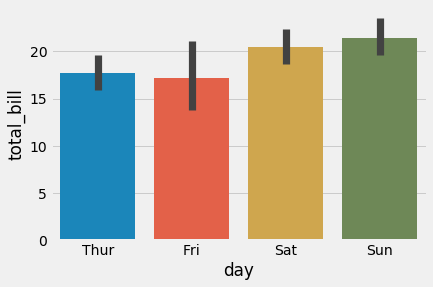

In [98]:
sns.barplot(x='day',y='total_bill',data=data) #from here we see that max people are eating on sundays

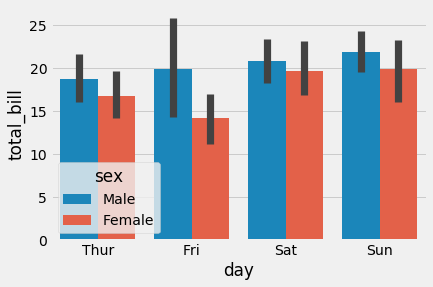

In [99]:
sns.barplot(x='day',y='total_bill',hue='sex',data=data)

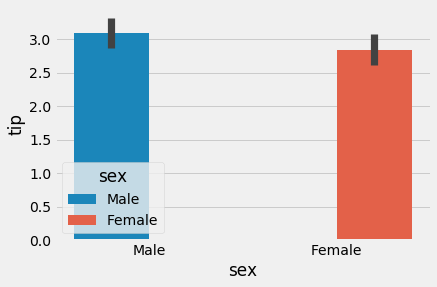

In [103]:
sns.barplot(x='sex',y='tip',hue='sex',data=data) #we see that mostly males are paying more tip

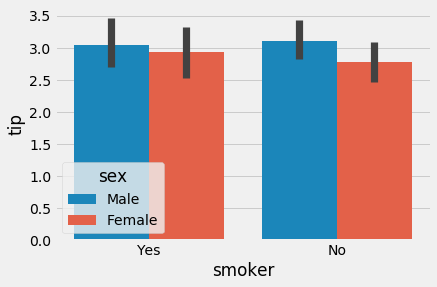

In [104]:
sns.barplot(x='smoker',y='tip',hue='sex',data=data) #non smokers give more tips

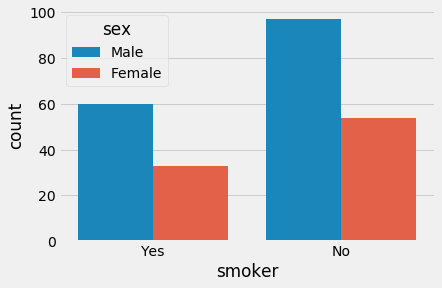

In [105]:
sns.countplot('smoker',hue='sex',data=data)

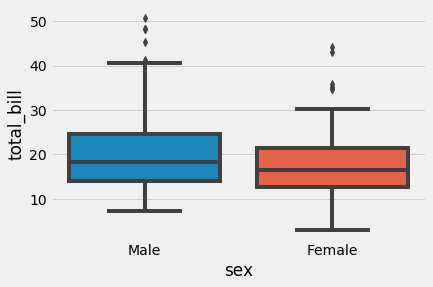

In [106]:
sns.boxplot(x='sex',y='total_bill',data=data)

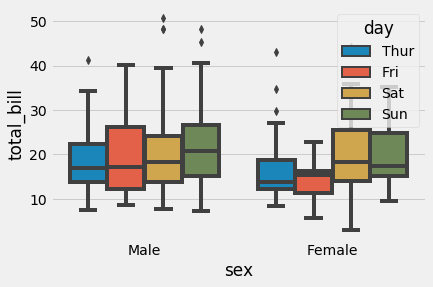

In [107]:
sns.boxplot(x='sex',y='total_bill',hue='day',data=data)

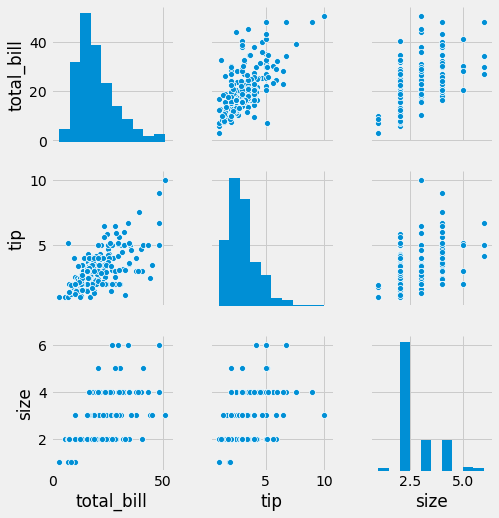

In [108]:
sns.pairplot(data)

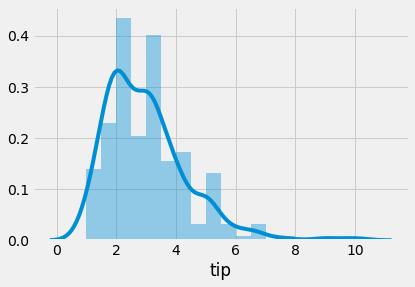

In [111]:
sns.distplot(data['tip']) #function needs a list to be given as a value. this gives us a KDE graph called KERNEL DENSITY DISTRIBUTION